#Tech Stack Used


1.   Artificial Intelligence
2.   Generative AI
3.   Data Analytics
4.   Data Visualization




#Part 01 (Disease Detection from symptoms)

**1. Importing Libraries:**
The code imports necessary libraries such as pandas for data manipulation, matplotlib and seaborn for data visualization, and tabulate for creating formatted tables.

**2. Definition of `diagnose_disease` Function:**
This function takes a list of symptoms as input and matches them against predefined symptoms associated with various diseases. It counts the number of matching symptoms for each disease and returns the disease along with its severity based on the number of matching symptoms.

**3. Reading Data:**
The code reads patient data from an Excel file named "symptoms.xlsx" using pandas' `read_excel` function. Each row represents a patient, and symptoms are listed from the second column onwards.

**4. Processing Patient Data:**
For each patient, the symptoms are extracted from the corresponding row in the DataFrame. These symptoms are then passed to the `diagnose_disease` function to determine the patient's disease and condition (severity). The results are stored in a list of dictionaries called `reports`.

**5. Patient-wise Reports:**
The patient-wise reports are displayed in a formatted table using the `tabulate` function.

In [1]:
!gdown 1_tf_iPJDk6Y66v0jQaxCRoh71i1wStbM

Downloading...
From: https://drive.google.com/uc?id=1_tf_iPJDk6Y66v0jQaxCRoh71i1wStbM
To: /content/symptoms.xlsx
100% 6.31k/6.31k [00:00<00:00, 16.6MB/s]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Define function to analyze symptoms and diagnose disease
def diagnose_disease(symptoms):
    # Dictionary mapping diseases to their associated symptoms
    disease_symptoms = {
        "Flu": ["fever", "cough"],
        "Cold": ["runny nose", "sore throat", "sneezing"],
        "Pneumonia": ["high fever", "shortness of breath", "chest pain"],
        "Allergy": ["itchy eyes", "runny nose", "sneezing"],
        "Stomach Flu": ["nausea", "vomiting", "diarrhea"],
        "Bronchitis": ["cough", "wheezing", "chest discomfort", "fatigue"],
        "Strep Throat": ["sore throat", "fever", "swollen lymph nodes", "headache"],
        "Ear Infection": ["ear pain", "fever", "ear drainage", "dizziness"],
        "Sinus Infection": ["nasal congestion", "facial pain", "headache", "fever"],
        "Conjunctivitis": ["red eyes", "eye discharge", "itchy eyes", "light sensitivity"],
        "Migraine": ["severe headache", "nausea", "sensitivity to light", "visual disturbances"],
        "Arthritis": ["joint pain", "stiffness", "swelling", "decreased range of motion"],
        "Diabetes": ["increased thirst", "frequent urination", "fatigue", "blurred vision"],
    }

    # Initialize dictionary to store the count of matching symptoms for each disease
    disease_counts = {disease: 0 for disease in disease_symptoms}

    # Count the number of matching symptoms for each disease
    for symptom in symptoms:
        for disease, disease_symptoms_list in disease_symptoms.items():
            if symptom in disease_symptoms_list:
                disease_counts[disease] += 1

    # Check if any disease has 3 matching symptoms
    for disease, count in disease_counts.items():
        if count == 3:
            return disease, "Severe"  # Return disease as "Severe" if all 3 symptoms match

    # Check if any disease has 2 matching symptoms
    for disease, count in disease_counts.items():
        if count == 2:
            return disease, "Effected"  # Return disease as "Effected" if at least 2 symptoms match

    # Return "Normal" if no matching disease found
    return disease, "Normal"


# Read data from Excel file
data = pd.read_excel("symptoms.xlsx")

# Process each patient data
reports = []
for index, row in data.iterrows():
    patient_id = row["Patient ID"]
    symptoms = list(row[1:])  # Extract symptoms from second column onwards
    disease, condition = diagnose_disease(symptoms)
    reports.append({"Patient ID": patient_id, "Disease": disease, "Condition": condition})

table = tabulate(reports, headers="keys", tablefmt="fancy_grid")
print("\nPatient-wise Reports:")
print(table)



Patient-wise Reports:
╒══════════════╤════════════════╤═════════════╕
│   Patient ID │ Disease        │ Condition   │
╞══════════════╪════════════════╪═════════════╡
│            1 │ Flu            │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            2 │ Cold           │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            3 │ Pneumonia      │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            4 │ Allergy        │ Severe      │
├──────────────┼────────────────┼─────────────┤
│            5 │ Allergy        │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            6 │ Diabetes       │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            7 │ Diabetes       │ Normal      │
├──────────────┼────────────────┼─────────────┤
│            8 │ Ear Infection  │ Effected    │
├──────────────┼────────────────┼─────────────┤
│            9 │ Strep Throat   │ Effected    │
├──────────────┼─

In [3]:
# Extract diseases from reports and remove duplicates
diseases = list(set(report["Disease"] for report in reports))

# Display the diseases
print("Unique Diseases:")
print(diseases)


Unique Diseases:
['Flu', 'Allergy', 'Cold', 'Strep Throat', 'Ear Infection', 'Arthritis', 'Pneumonia', 'Diabetes', 'Conjunctivitis']


#Part 02 (Visualizing the Results)

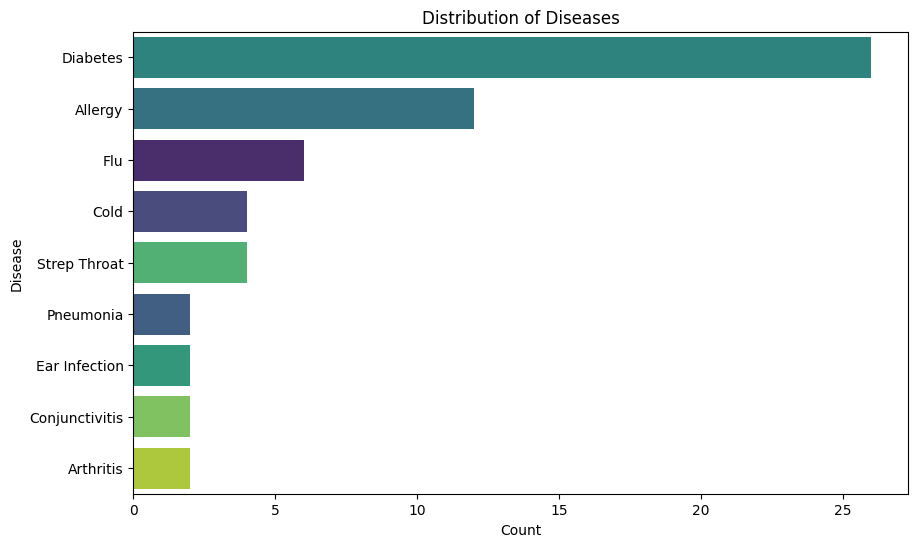

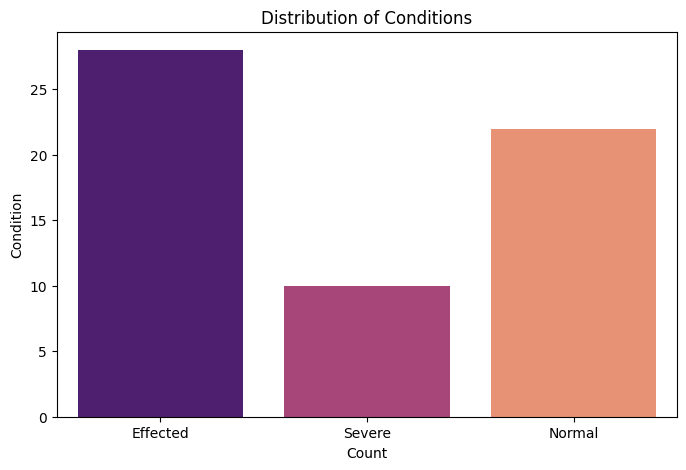

In [4]:
# Convert reports to DataFrame
df_reports = pd.DataFrame(reports)

# Plot the distribution of diseases
plt.figure(figsize=(10, 6))
sns.countplot(y='Disease', data=df_reports, order=df_reports['Disease'].value_counts().index, hue='Disease', palette='viridis', legend=False)
plt.title('Distribution of Diseases')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.show()

# Plot the distribution of conditions
plt.figure(figsize=(8, 5))
sns.countplot(x='Condition', data=df_reports, hue='Condition', palette='magma', legend=False)
plt.title('Distribution of Conditions')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()

#Part 03 (Checking for patient food safety)

In [5]:
# Install Tesseract and pytesseract
!sudo apt install tesseract-ocr
!pip install pytesseract
import pytesseract
from PIL import Image
import requests
from io import BytesIO
# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1min 12s (67.2 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [6]:
!gdown 1LtVxp52LnwUjuojjRP0Ot8zksbFEEeJP

Downloading...
From: https://drive.google.com/uc?id=1LtVxp52LnwUjuojjRP0Ot8zksbFEEeJP
To: /content/lays.png
100% 193k/193k [00:00<00:00, 58.8MB/s]


In [7]:
from PIL import Image
import pytesseract
import re

# Path to the image file
image_path = '/content/lays.png'

# Open the image using PIL
image = Image.open(image_path)

# Extract text from the image using pytesseract
extracted_text = pytesseract.image_to_string(image)
# Clean the extracted text
text_cleaned = re.sub(r'\(\d+\)|\(\d+\.\d+\)', '', extracted_text)

# Split the text into individual items
items = re.findall(r'\b[A-Za-z\s&]+\b', text_cleaned)

In [8]:
!pip install -q google-generativeai

Model Name: models/text-bison-001
models/text-bison-001


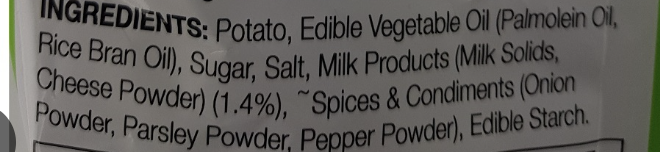

**Patient 1 (Flu)**

* **Harmful substances:** Sugar, salt, edible vegetable oil, palmolein oil, wheat bran oil
* **Ayurvedic considerations:** Sugar and salt are both considered to be harmful to health in general, and are especially contraindicated for people with flu. Edible vegetable oil, palmolein oil, and wheat bran oil are all high in saturated fat, which can contribute to inflammation and other health problems.

**Patient 2 (Allergy)**

* **Harmful substances:** Sugar, salt, milk products, pepper powder
* **Ayurvedic considerations:** Sugar and salt are both considered to be harmful to health in general, and are especially contraindicated for people with allergies. Milk products are also a common allergen, and pepper powder can irritate the mucous membranes.

**Patient 3 (Cold)**

* **Harmful substances:** Sugar, salt, edible vegetable oil, palmolein oil, wheat bran oil
* **Ayurvedic considerations:** Sugar and salt are both considered to be harmful to health in general, and are

In [9]:
import google.generativeai as palm
palm.configure(api_key = "")
models = [
    m for m in palm.list_models() if "generateText" in m.supported_generation_methods
]

for m in models:
  print(f"Model Name: {m.name}")

model = models[0].name
print(model)
# Add the analysis result to the prompt
prompt = f"""
Ingredients List:
{items} and
Diseases {diseases}

Analysis:
After thorough examination, considering the potential risks associated with excessive consumption, the following harmful substances have been identified. These will only be listed if they are particularly concerning. Please note any exceptions for commonly used ingredients such as sugar and salt, as well as any considerations from an Ayurvedic perspective.
It's important to tailor the report for each individual patient.
Patient-wise Report for first 3 disease:
"""


completion = palm.generate_text(
    model=model,
    prompt=prompt,
    temperature=0.3,
    # The maximum length of the response
    max_output_tokens=2000,
)
image = Image.open(image_path)
display(image)
print(completion.result)